In [20]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import StructType, StructField, FloatType, LongType, StringType, BooleanType, IntegerType, DateType, ArrayType
from pyspark.sql.functions import col, split, explode, desc

sqlContext = SQLContext(sc)

# Create schema for the date
schema = StructType([StructField("date", DateType(), True), 
                     StructField("lead_paragraph", StringType(), True)])

# Load from hdfs
df = sqlContext.read.csv("hdfs://orion11:15001/sample_nytimes.csv",schema=schema, sep="\t");

## Betty's links
## bigget sample: hdfs://orion11:32001/final/bigger_sample.csv
## all data:   hdfs://orion11:32001/nytimes_lead_paragraphs_Sep-1851-July-2017.csv
##movie data: hdfs://orion11:32001/final/title.basics.tsv

In [21]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return str(score)

In [22]:
### Sentiment for 1930's

# Get DF
df.createOrReplaceTempView("TEMP_DF")
df_1930 = spark.sql("""select * from TEMP_DF WHERE temp_df.date LIKE '193%'""")

#build sentimental analysis
analyser = SentimentIntensityAnalyzer()



pand = df_1930.toPandas()
pand['analysis'] = pand['lead_paragraph'].apply(sentiment_analyzer_scores)
pand = pand.drop(columns=['lead_paragraph'])

pand.iloc[:4]


#count neg and pos for each year
answer = []

for row in pand.itertuples():
    rows = row.analysis
    rows = rows.replace("'",'"') 
    data = json.loads(rows)
    columns = list(data.keys())
    values = list(data.values())
    arr_len = len(values)

    res = pd.DataFrame(np.array(values, dtype=object).reshape(1, arr_len), columns=columns)
    answer.append(res)
    
news_1930 = pd.concat(answer)
sentiment_1930 = news_1930.sum(axis = 0, skipna = True)["compound"]
print(sentiment_1930)

5294.242300000068


In [23]:
### Sentiment for 1960's

# Get DF
df.createOrReplaceTempView("TEMP_DF")
df_1960 = spark.sql("""select * from TEMP_DF WHERE temp_df.date LIKE '196%'""")

#build sentimental analysis
analyser = SentimentIntensityAnalyzer()



pand = df_1960.toPandas()
pand['analysis'] = pand['lead_paragraph'].apply(sentiment_analyzer_scores)
pand = pand.drop(columns=['lead_paragraph'])

pand.iloc[:4]


#count neg and pos for each year
answer = []

for row in pand.itertuples():
    rows = row.analysis
    rows = rows.replace("'",'"') 
    data = json.loads(rows)
    columns = list(data.keys())
    values = list(data.values())
    arr_len = len(values)

    res = pd.DataFrame(np.array(values, dtype=object).reshape(1, arr_len), columns=columns)
    answer.append(res)
    
news_1960 = pd.concat(answer)
sentiment_1960 = news_1960.sum(axis = 0, skipna = True)["compound"]
print(sentiment_1960)

3467.3983999999605


In [24]:
### Sentiment for 1990's

# Get DF
df.createOrReplaceTempView("TEMP_DF")
df_1990 = spark.sql("""select * from TEMP_DF WHERE temp_df.date LIKE '199%'""")

#build sentimental analysis
analyser = SentimentIntensityAnalyzer()



pand = df_1990.toPandas()
pand['analysis'] = pand['lead_paragraph'].apply(sentiment_analyzer_scores)
pand = pand.drop(columns=['lead_paragraph'])

pand.iloc[:4]


#count neg and pos for each year
answer = []

for row in pand.itertuples():
    rows = row.analysis
    rows = rows.replace("'",'"') 
    data = json.loads(rows)
    columns = list(data.keys())
    values = list(data.values())
    arr_len = len(values)

    res = pd.DataFrame(np.array(values, dtype=object).reshape(1, arr_len), columns=columns)
    answer.append(res)
    
news_1990 = pd.concat(answer)
sentiment_1990 = news_1990.sum(axis = 0, skipna = True)["compound"]
print(sentiment_1990)

5333.998900000031


In [25]:
## Betty's path
## hdfs://orion11:32001/final/title.basics.tsv

# tconst titleType primaryTitle originalTitle isAdult startYear endYear runtimeMinutes genres
movie_schema = StructType([StructField("tconst", StringType(), True), 
                           StructField("titleType", StringType(), True),
                           StructField("primaryTitle", StringType(), True), 
                           StructField("originalTitle", StringType(), True),
                           StructField("isAdult", StringType(), True),
                           StructField("startYear", StringType(), True), 
                           StructField("endYear", StringType(), True),
                           StructField("runtimeMinutes", IntegerType(), True),
                           StructField("genres", StringType(), True)])



movies_df = sqlContext.read.csv("hdfs://orion11:15001/imdb_data.tsv",schema=movie_schema, header=True, sep="\t");

In [35]:
# Top generes for the 1930's

movies_1930 = movies_df.filter("startYear like '193%'").select("startYear", "endYear", "genres")

# Apparently the /N is a pain to handle. Need to use SQL
movies_1930.createOrReplaceTempView("MOV_DF")
movies_1930 = spark.sql("""select MOV_DF.genres, MOV_DF.startYear, MOV_DF.endYear from MOV_DF WHERE MOV_DF.genres NOT LIKE '%\\N%'""")

movies_1930 = movies_1930.withColumn('genres',explode(split('genres',',')))

movies_1930 = movies_1930.groupBy("genres").count().sort("count", ascending=False)
genres_1930  = movies_1930.limit(3).select('genres').rdd.flatMap(lambda x: x).collect()
movies_1930.show(3)

+------+-----+
|genres|count|
+------+-----+
| Short| 8807|
| Drama| 8401|
|Comedy| 7883|
+------+-----+
only showing top 3 rows



In [36]:
# Top generes for the 1960's

movies_1960 = movies_df.filter("startYear like '196%'").select("startYear", "endYear", "genres")

# Apparently the /N is a pain to handle. Need to use SQL
movies_1960.createOrReplaceTempView("MOV_DF")
movies_1960 = spark.sql("""select MOV_DF.genres, MOV_DF.startYear, MOV_DF.endYear from MOV_DF WHERE MOV_DF.genres NOT LIKE '%\\N%'""")

movies_1960 = movies_1960.withColumn('genres',explode(split('genres',',')))

movies_1960 = movies_1960.groupBy("genres").count().sort("count", ascending=False)
genres_1960  = movies_1960.limit(3).select('genres').rdd.flatMap(lambda x: x).collect()
movies_1960.show(3)

+------+-----+
|genres|count|
+------+-----+
| Drama|59220|
|Comedy|42929|
|Family|27969|
+------+-----+
only showing top 3 rows



In [37]:
# Top generes for the 1990's

movies_1990 = movies_df.filter("startYear like '199%'").select("startYear", "endYear", "genres")

# Apparently the /N is a pain to handle. Need to use SQL
movies_1990.createOrReplaceTempView("MOV_DF")
movies_1990 = spark.sql("""select MOV_DF.genres, MOV_DF.startYear, MOV_DF.endYear from MOV_DF WHERE MOV_DF.genres NOT LIKE '%\\N%'""")

movies_1990 = movies_1990.withColumn('genres',explode(split('genres',',')))

movies_1990 = movies_1990.groupBy("genres").count().sort("count", ascending=False)
genres_1990  = movies_1990.limit(3).select('genres').rdd.flatMap(lambda x: x).collect()
movies_1990.show(3)

+-------+------+
| genres| count|
+-------+------+
|  Drama|174942|
| Comedy|127185|
|Romance| 81793|
+-------+------+
only showing top 3 rows



In [38]:
sentiment = [sentiment_1930, sentiment_1960, sentiment_1990]
genres = [", ".join(genres_1930), ", ".join(genres_1960), ", ".join(genres_1990)]

print(sentiment)
print(genres)


[5294.242300000068, 3467.3983999999605, 5333.998900000031]
['Short, Drama, Comedy', 'Drama, Comedy, Family', 'Drama, Comedy, Romance']


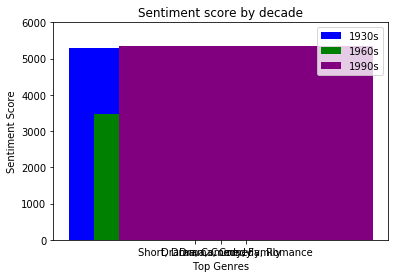

In [64]:
# I know it goesn't look great...

# Create plot
fig, ax = plt.subplots()
ax.bar([", ".join(genres_1930)], [sentiment_1930], 10, color='blue',label="1930s")
ax.bar([", ".join(genres_1960)], [sentiment_1960], 10, color='green',label="1960s")
ax.bar([", ".join(genres_1990)],[sentiment_1990],  10, color='purple',label="1990s")

ax.legend(loc="upper right")
ax.set_ylabel('Sentiment Score')
ax.set_xlabel('Top Genres')
ax.set_title('Sentiment score by decade')
ax.set_yticks(range(0, 7000, 1000))
ax.set_xticks(genres)
fig.savefig('sentiment_score_by_decade', dpi=300)